## <font color = blue>1. What is Hierarchical clustering</font>

Hierarchical clustering is an unsupervised algorithm which works on the concept of clustering same as the way k-means
work, however in this case we find the optimal number of clusters using a dendrogram. Dendrogram is a plot which
represents distance between the different clusters for n-number of clusters.

Hierarchical clustering is of 2 types namely:
    
    a) Agglomerative Hierarchical clustering
    
    b) Divisive Hierarchical clustering
    
The concept we are going to study in this session is Agglomerative Hierarchical clustering.

## <font color = blue>2. What is Agglomerative clustering?</font>

In Agglomerative Hierarchical clustering we follow the following steps:
    
1. We consider each co-ordinate as 1 single cluster.

2. We find the closest cluster and group these clusters to form a bigger cluster.

3. We go on doing this till we get 1 unified big cluster.

4. We plot a Dendrogram (plot of Distance vs co-ordinates) and cut the highest distance cluster on dendrogram. The total    number of lines the dendrogram is cut into will give us the optimal number of clusters.
   
To understand the concept visually look at the image below.

In [1]:
from google.colab import files
from IPython.display import Image

In [2]:
uploaded = files.upload()

Saving agg_1.png to agg_1.png


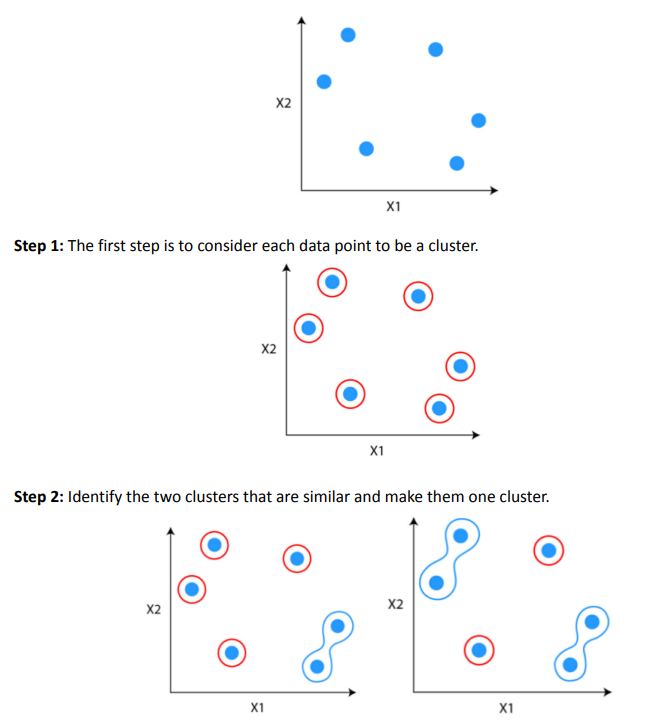

In [3]:
Image('agg_1.png')

In [4]:
uploaded = files.upload()

Saving agg_2.png to agg_2.png


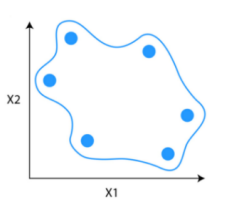

In [5]:
Image('agg_2.png')

## <font color = blue>3. Understanding the way to compute a Dendrogram.</font>

Dendrogram is a tree like diagram that shows the hierarchical relationship between the observations. It
contains the memory of hierarchical clustering algorithms.

Just by looking at the Dendrogram you can tell how the cluster is formed. Let see how to form the
dendrogram for the below data points.

In [6]:
uploaded = files.upload()

Saving dend_1.png to dend_1.png


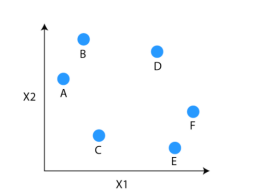

In [7]:
Image('dend_1.png')

The observations E and F are closest to each other by any other points. So, they are combined into one
cluster and also the height of the link that joins them together is the smallest. The next observations that
are closest to each other are A and B which are combined together.

This can also be observed in the dendrogram as the height of the block between A and B is slightly bigger
than E and F. Similarly, D can be merged into E and F clusters and then C can be combined to that. Finally
A and B combined to C, D, E and F to form a single cluster.

In [8]:
uploaded = files.upload()

Saving dend_2.png to dend_2.png


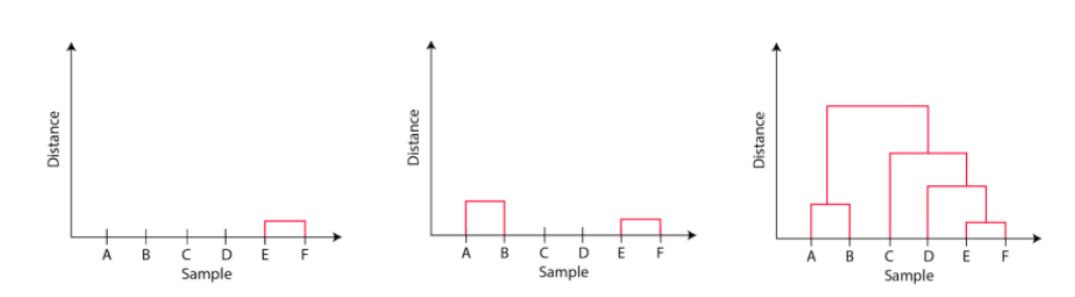

In [9]:
Image('dend_2.png')

The important point to note while reading dendrogram is that:
    
1. Height of the blocks represents the distance between clusters, and

2. Distance between observations represents dissimilarities.

But the question still remains the same, how do we find the number of clusters using a dendrogram or
where should we stop merging the clusters? Observations are allocated to clusters by drawing a
horizontal line through the dendrogram.

In [10]:
uploaded = files.upload()

Saving dend_3.png to dend_3.png


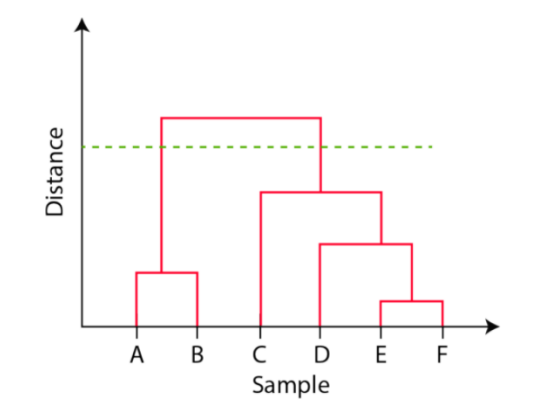

In [11]:
Image('dend_3.png')

Generally, we cut the dendrogram in such a way that it cuts the tallest vertical line. In the above
example, we have two clusters. One cluster has observations A and B, and a second cluster has C, D, E,
and F.

## <font color = blue>4. What is Divisive Hierarchical clustering?</font>

Divisive hierarchical clustering is not used much in solving real-world problems. It works in the opposite
way of agglomerative clustering. In this, we start with all the data points as a single cluster.

At each iteration, we separate the farthest points or clusters which are not similar until each data point is
considered as an individual cluster. Here we are dividing the single clusters into n clusters, therefore the
name divisive clustering.

## <font color = blue>5. What are pros and cons for Hierarchical clustering?</font>

Some of the pros and cons of Hierarchical clustering are as follows:
    
1. Like K-means clustering, we need not to specify the number of clusters required for the algorithm.

2. It doesn’t work well on the large dataset. It is generally applicable to the smaller data. If you have a large dataset,
   it can become difficult to determine the correct number of clusters by the dendrogram.
    
3. In comparison to K-means, hierarchical clustering is computationally heavy and takes longer time to run.

## Code

## <font color = red>1. Importing the libraries</font>

Let us import the necessary libraries first.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## <font color = red>2. Reading the data</font>

Let us read the data now. The data is a travel_data from different activities done by users across Europe.

In [ ]:
travel_data = pd.read_csv('google_review_ratings.csv', index_col=0, header = 0)

In [ ]:
travel_data

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN


## <font color = red>3. Dropping unnecessary columns</font>

We do not need the column 'Unnamed: 25' from the data. So we are dropping it.
Remember axis=1 will drop the column whereas axis = 0 will drop the rows.Inplace= true will reflect the changes immediately
on the dataset.

In [ ]:
travel_data.drop(['Unnamed: 25'],axis=1,inplace=True)
travel_data.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


## <font color = red>4. Null value check</font>

Now let us check for any Null values in the dataset.

In [ ]:
travel_data.isnull().sum()

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    1
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    1
dtype: int64

We do have null values in the dataset. Since we have null values in the dataset, we are dropping those null values using
dropna() function.

In [ ]:
travel_data = travel_data.dropna()

In [ ]:
travel_data.isnull().sum()

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64

So finally we got rid of null values now. Let us check the datatype of the columns now.

In [ ]:
travel_data.dtypes

Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
Category 11     object
Category 12    float64
Category 13    float64
Category 14    float64
Category 15    float64
Category 16    float64
Category 17    float64
Category 18    float64
Category 19    float64
Category 20    float64
Category 21    float64
Category 22    float64
Category 23    float64
Category 24    float64
dtype: object

There is a minor discrepancy in the data. We have got Category 11 data type as object instead of float. Let us
debug why is it so.

In [ ]:
travel_data['Category 11'].unique()

array(['1.7', '1.73', '1.71', '1.69', '1.67', '1.65', '1.66', '1.64',
       '1.63', '5', '1.56', '1.55', '1.53', '1.52', '1.51', '1.5', '1.49',
       '1.48', '1.46', '2.13', '2.12', '2.1', '2.09', '2.08', '2.07',
       '2.06', '2.05', '2.04', '2.03', '2.01', '2', '1.98', '1.97',
       '1.95', '1.93', '1.91', '1.9', '1.88', '1.86', '1.84', '1.83',
       '1.81', '1.79', '1.77', '1.74', '1.72', '1.68', '1.61', '1.6',
       '1.59', '1.58', '1.99', '2.47', '2.35', '2.48', '2.59', '3.39',
       '2.31', '2.78', '2.79', '2.77', '2.76', '2.75', '2.74', '2.72',
       '2.71', '2.69', '2.68', '2.66', '2.65', '2.63', '2.61', '2.57',
       '2.55', '2.53', '2.51', '2.49', '1.94', '1.92', '1.82', '1.76',
       '1.62', '4.08', '4.04', '4.02', '4.01', '4', '3.99', '3.98',
       '3.96', '3.95', '3.94', '3.93', '3.91', '3.9', '3.88', '3.87',
       '3.86', '3.84', '3.85', '2.17', '3', '2.99', '2.82', '2.83',
       '2.81', '2.8', '2.73', '2.67', '2.64', '2.62', '2.54', '2.52',
       '2.5', '2.

As one can see clearly, when we check the values for Category 11 we see them enclosed inside inverted commas which
is why the machine is considering it as string (object) while interpreting.

Let us convert it to float.

In [ ]:
travel_data['Category 11'] = travel_data['Category 11'].astype(float)

C:\Users\ninad\AppData\Local\Temp\ipykernel_8368\3439813859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel_data['Category 11'] = travel_data['Category 11'].astype(float)


In [ ]:
travel_data.dtypes


Category 1     float64
Category 2     float64
Category 3     float64
Category 4     float64
Category 5     float64
Category 6     float64
Category 7     float64
Category 8     float64
Category 9     float64
Category 10    float64
Category 11    float64
Category 12    float64
Category 13    float64
Category 14    float64
Category 15    float64
Category 16    float64
Category 17    float64
Category 18    float64
Category 19    float64
Category 20    float64
Category 21    float64
Category 22    float64
Category 23    float64
Category 24    float64
dtype: object

## <font color = red>5. Assigning column headers</font>

Now we have all the columns in the right data type. However we still do not have column headers for the data.
So let us assign the column headers as well.

In [ ]:
travel_data.columns= [ 'churches', 'resorts', 'beaches', 'parks',
                'theatres', 'museums', 'malls', 'zoo', 'restaurants',
                'pubs_bars', 'local_services', 'burger_pizza_shops',
                'hotels_other_lodgings', 'juice_bars', 'art_galleries',
                'dance_clubs', 'swimming_pools', 'gyms', 'bakeries',
                'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']

In [ ]:
travel_data.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [ ]:
travel_data.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,...,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000
mean,1.455746,2.320048,2.489059,2.797103,2.958904,2.893423,3.351476,2.541177,3.126542,2.832695,...,2.206140,1.192710,0.949349,0.822525,0.969250,0.999626,0.965275,1.749345,1.531051,1.560570
std,0.827732,1.421576,1.247503,1.309188,1.338785,1.282101,1.413291,1.111398,1.356774,1.307299,...,1.715848,1.107176,0.973628,0.948015,1.202883,1.193129,0.928326,1.597816,1.316180,1.171784
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.790000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.910000,2.060000,2.460000,2.670000,2.680000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.687500,2.740000,4.097500,4.310000,3.837500,5.000000,3.190000,5.000000,3.527500,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## <font color = red>6. EDA: Plotting a Dendrogram</font>

Now let us plot a dendrogram and try to figure out how many clusters are formed.

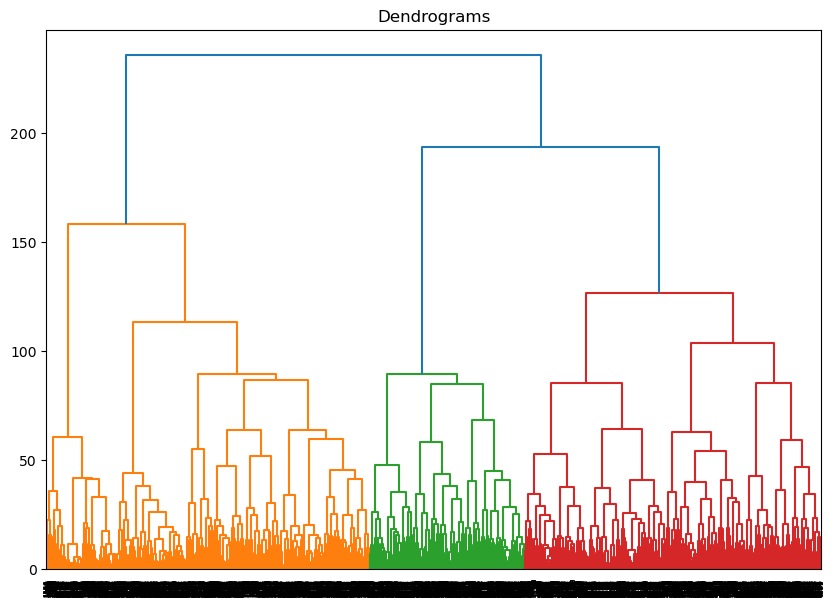

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(travel_data, method="ward"))

So now one can clearly see from the above data that we have obtained 3 clusters (orange, red & green). Now
we have to select a line on the highest distance in such a way that it cuts the dendrogram 3 times. The ideal height
here would be 180.
Let us cut the height using axhline function. We are using red coloured '--' line to cut the dendrogram.

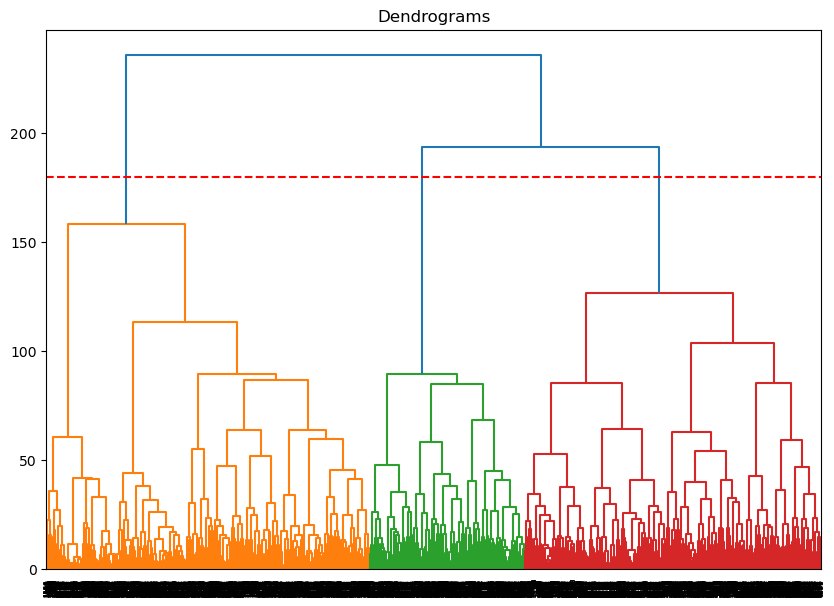

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(travel_data, method="ward"))

plt.axhline(y=180, color='r',linestyle='--')

## <font color = red>7. Applying Agglomerative Clustering & predicting Y_pred</font>

Now let us apply Agglomerative clustering with number of clusters = 3 and the affinity is basically the way the
clusters are formed for which we have used the metric 'euclidean' and lastly we have linkage which specifies the linkage
criterion used to determine the distance between clusters. 'ward' minimizes the
variance of the clusters being merged. There are other options like 'complete', 'average', etc., each with its own way
of computing the distance between clusters.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')


now let us predict Y_pred by fitting the variable 'cluster' on the 'travel_data'

In [ ]:
Y_pred = cluster.fit_predict(travel_data)

C:\Users\ninad\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## <font color = red>8. Constructing a dataframe</font>

Now let us add Y_pred as 'Clusters' column into our travel_data.

In [ ]:
travel_data['Clusters']= Y_pred
travel_data.head(30)

C:\Users\ninad\AppData\Local\Temp\ipykernel_8368\781726357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel_data['Clusters']= Y_pred


,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,0.59,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,1
User 2,0.0,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,0.59,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,1
User 3,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.59,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,1
User 4,0.0,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,0.59,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,1
User 5,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,0.59,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,1
User 6,0.0,0.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.65,...,0.59,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,1
User 7,0.0,5.00,3.63,3.63,5.00,2.92,3.03,2.35,2.33,2.64,...,0.59,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,1
User 8,0.0,5.00,3.63,3.63,5.00,2.92,5.00,2.63,2.33,2.64,...,0.60,0.50,0.0,0.5,0.00,0.0,0.0,0.0,0.0,1
User 9,0.0,5.00,3.64,3.64,5.00,2.92,3.03,2.62,2.32,2.63,...,0.60,0.00,0.0,0.5,0.00,0.0,0.0,0.0,0.0,1


Since we cannot see all the clusters properly, let us see how individual clusters look like

In [ ]:
# Cluster 0

cluster_0 = travel_data[travel_data['Clusters']==0]

print(f"Shape is: {cluster_0.shape}")

cluster_0.head()

Shape is: (2278, 25)


,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
User,,,,,,,,,,,,,,,,,,,,,
User 41,0.54,0.57,0.67,3.71,5.00,2.95,2.94,2.59,1.66,2.27,...,0.70,0.54,0.00,0.0,0.00,0.50,0.00,0.51,0.54,0
User 57,0.69,0.69,0.72,5.00,3.83,2.96,2.94,5.00,2.89,2.16,...,1.56,0.63,0.00,0.0,0.00,0.50,0.63,0.62,0.64,0
User 122,0.73,5.00,1.34,1.33,1.35,1.37,4.11,5.00,5.00,2.30,...,0.78,0.80,0.82,1.1,0.78,0.65,0.65,0.67,0.88,0
User 123,5.00,5.00,5.00,1.33,1.34,1.37,4.15,5.00,2.85,2.76,...,0.78,0.79,0.81,1.1,0.67,0.65,0.64,0.67,0.89,0
User 124,0.73,1.25,1.34,1.33,1.34,4.71,4.12,5.00,5.00,2.76,...,0.78,0.78,0.81,1.1,1.83,0.65,0.64,0.66,0.69,0


In [ ]:
# Cluster 1

cluster_1 = travel_data[travel_data['Clusters']==1]

print(f"Shape is: {cluster_1.shape}")

cluster_1.head()

Shape is: (2086, 25)


,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
# Cluster 2

cluster_2 = travel_data[travel_data['Clusters']==2]

print(f"Shape is: {cluster_2.shape}")

cluster_2.head()

Shape is: (1090, 25)


,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
User,,,,,,,,,,,,,,,,,,,,,
User 179,1.50,1.86,1.86,1.71,3.19,4.36,4.55,5.00,5.00,1.67,...,0.52,0.51,0.52,0.53,5.00,1.08,1.32,1.31,1.33,2
User 180,1.42,1.88,1.88,5.00,3.19,4.36,3.97,3.89,5.00,1.65,...,0.51,0.50,0.51,0.61,5.00,1.09,1.34,1.33,1.36,2
User 748,1.57,1.59,1.63,1.90,1.89,1.89,5.00,1.94,2.55,2.17,...,5.00,5.00,5.00,0.52,0.67,1.56,1.55,1.54,1.54,2
User 749,1.57,1.61,1.64,1.90,1.89,1.90,5.00,2.03,2.37,2.16,...,5.00,5.00,4.59,0.00,1.61,1.57,1.56,1.55,1.56,2
User 750,1.58,2.55,2.56,1.90,1.89,1.90,5.00,1.95,2.53,2.14,...,5.00,5.00,4.59,0.00,0.66,1.58,1.57,1.56,1.57,2


## <font color = red>9. Mapping the clusters</font>

Let us map the clusters into labels to make the data more interpretable.
As for labels we are going to name

Cluster 0 ---> Negative

Cluster 1 ---> Neutral

Cluster 2 ---> Positive

In [ ]:
travel_data['Clusters'] = travel_data.Clusters.map({0: 'Negative', 1: 'Neutral', 2: 'Postive'})
travel_data.head()

C:\Users\ninad\AppData\Local\Temp\ipykernel_8368\1133237542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel_data['Clusters'] = travel_data.Clusters.map({0: 'Negative', 1: 'Neutral', 2: 'Postive'})


,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Clusters
User,,,,,,,,,,,,,,,,,,,,,
User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Neutral
User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Neutral
User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Neutral
User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Neutral
User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,Neutral


## <font color = red>10. Exporting the 'csv' file</font>

Lastly we export the data as a csv file to store our results.

In [ ]:
travel_data.to_csv(r"Final_clustered_data.csv", index = True)